In [14]:
from am4pa.linnea import LinneaConfig
from va4algs import DataExtractorLinnea
import pandas as pd

In [15]:
linnea_config = LinneaConfig("GLS",12)
linnea_config.set_local_directory("linnea/GLS/")
linnea_config.setup_backend_details(server="login18-1.hpc.itc.rwth-aachen.de",
                                   uname = "as641651",
                                   init_script="~/.analyzer",
                                   backend_dir="~/PhD/va4algs-exps/GLS/")
linnea_config.connect_backend()

In [16]:
de = DataExtractorLinnea(linnea_config)

op_sizes = [["1000", "200"], ["1000", "300"], ["1000", "100"], ["1000", "150"], ["100", "1000"] ]
de.add_operands(op_sizes)
de.generate_variants()

de.reset_measured()
de.check_measured(2)

#de.filter_on_flops(0.1)
#de.measure_variants(reps=5, run_id=2)
#de.prepare_data_for_analysis(cutoff=0, clear=False)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS/experiments/100_1000/run_times.csv linnea/GLS/cluster-data/100_1000
Command '['scp', 'as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS/experiments/100_1000/run_times.csv', 'linnea/GLS/cluster-data/100_1000']' returned non-zero exit status 1.


scp: /home/as641651/PhD/va4algs-exps/GLS/experiments/100_1000/run_times.csv: No such file or directory


In [17]:
de.filter_on_flops(0.0)
de.prepare_data_for_analysis(cutoff=0, clear=False)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprec

In [18]:
de.om.df

,op,generated,measured
0,1000_200,True,True
1,1000_300,True,True
2,1000_100,True,True
3,1000_150,True,True
4,100_1000,True,True


In [19]:
df_k = de.data_kernels
df_k

,node,class,operands,flops,kernel
0,LAPACK.potrf_2.67e+06,0,1000_200,2670000.0,LAPACK.potrf
1,LAPACK.potrf_3.33e+08,0,1000_200,333000000.0,LAPACK.potrf
2,gemv_4e+05,0,1000_200,400000.0,gemv
3,syrk_4e+07,0,1000_200,40000000.0,syrk
4,trsm_2e+08,0,1000_200,200000000.0,trsm
5,trsv_1e+06,0,1000_200,1000000.0,trsv
6,trsv_4e+04,0,1000_200,40000.0,trsv
7,LAPACK.potrf_3.33e+08,0,1000_300,333000000.0,LAPACK.potrf
8,LAPACK.potrf_9e+06,0,1000_300,9000000.0,LAPACK.potrf
9,gemv_6e+05,0,1000_300,600000.0,gemv


In [20]:
def correct_class_data(df):
    if not 1 in df.columns:
        df[1] = 0
    if not -1 in df.columns:
        df[-1] = 0
    return df

In [21]:
sa = df_k.groupby(["kernel", "class"])['class'].count().unstack(fill_value=0)
sa = correct_class_data(sa)
#sa.reset_index()
sa

class,-1,0,1
kernel,,,
LAPACK.potrf,0,10,0
gemv,0,5,0
syrk,0,5,0
transpose,1,0,0
trsm,0,5,0
trsv,0,10,0


In [22]:
def compute_class_statistics(df):
    df['total'] = df.apply(lambda x: x[-1]+x[0]+x[1], axis=1)
    df['good (%)'] = df.apply(lambda x: x[1]/float(x['total']), axis=1).round(2)
    df['bad (%)'] = df.apply(lambda x: x[-1]/float(x['total']), axis=1).round(2)
    df['selection score'] = df.apply(lambda x: x[1]/float(x[1]+ x[-1]), axis=1).fillna(-1).round(2)
    return df.reset_index()

In [23]:
sa = compute_class_statistics(sa)
sa

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_25800/113630037.py:5: RuntimeWarning: invalid value encountered in double_scalars
  df['selection score'] = df.apply(lambda x: x[1]/float(x[1]+ x[-1]), axis=1).fillna(-1).round(2)


class,kernel,-1,0,1,total,good (%),bad (%),selection score
0,LAPACK.potrf,0,10,0,10,0.0,0.0,-1.0
1,gemv,0,5,0,5,0.0,0.0,-1.0
2,syrk,0,5,0,5,0.0,0.0,-1.0
3,transpose,1,0,0,1,0.0,1.0,0.0
4,trsm,0,5,0,5,0.0,0.0,-1.0
5,trsv,0,10,0,10,0.0,0.0,-1.0


In [24]:
sb = pd.DataFrame(de.data_ext.groupby(['kernel'])['case:rel-flops'].min()).reset_index()
s1 = sb.merge(sa, on='kernel')
s1

,kernel,case:rel-flops,-1,0,1,total,good (%),bad (%),selection score
0,LAPACK.potrf,0.0,0,10,0,10,0.0,0.0,-1.0
1,gemv,0.0,0,5,0,5,0.0,0.0,-1.0
2,syrk,0.0,0,5,0,5,0.0,0.0,-1.0
3,transpose,0.0,1,0,0,1,0.0,1.0,0.0
4,trsm,0.0,0,5,0,5,0.0,0.0,-1.0
5,trsv,0.0,0,10,0,10,0.0,0.0,-1.0


In [25]:
#s2 = df_k[['kernel', 'class']].groupby(['kernel']).count()
#s2

In [26]:
#df_k[['kernel', 'class']].query("`class` == 1").groupby(['kernel']).count()

In [27]:
df_r = de.data_relations

In [28]:
s2 = df_r.groupby(["kernelA", "kernelB", "class"])['class'].count().unstack(fill_value=0)
s2 = correct_class_data(s2)
s2 = compute_class_statistics(s2)
s2

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_25800/113630037.py:5: RuntimeWarning: invalid value encountered in double_scalars
  df['selection score'] = df.apply(lambda x: x[1]/float(x[1]+ x[-1]), axis=1).fillna(-1).round(2)


class,kernelA,kernelB,-1,0,1,total,good (%),bad (%),selection score
0,@@startnode,LAPACK.potrf,0,5,0,5,0.0,0.00,-1.00
1,@@startnode,transpose,1,0,0,1,0.0,1.00,0.00
2,LAPACK.potrf,gemv,1,4,0,5,0.0,0.20,0.00
3,LAPACK.potrf,trsm,0,5,0,5,0.0,0.00,-1.00
4,LAPACK.potrf,trsv,1,8,6,15,0.4,0.07,0.86
5,gemv,LAPACK.potrf,0,4,1,5,0.2,0.00,1.00
6,gemv,syrk,1,2,2,5,0.4,0.20,0.67
7,gemv,trsm,0,1,0,1,0.0,0.00,-1.00
8,gemv,trsv,0,5,0,5,0.0,0.00,-1.00
9,syrk,LAPACK.potrf,0,4,1,5,0.2,0.00,1.00


In [29]:
# s2['total'] = s2.apply(lambda x: x[-1]+x[0]+x[1], axis=1)
# s2['good (%)'] = s2.apply(lambda x: x[1]/float(x['total']), axis=1).round(2)
# s2['bad (%)'] = s2.apply(lambda x: x[-1]/float(x['total']), axis=1).round(2)
# s2['selection score'] = s2.apply(lambda x: x[1]/float(x[1]+ x[-1]), axis=1).fillna(-1).round(2)

# s2.reset_index()

In [30]:
#s2[(s2['good (%)'] + s2['bad (%)'] >= 0.8) ].reset_index().sort_values(by=['selection score'], ascending=False)

In [31]:
#s2[(s2['good (%)'] >= 0.5) |  (s2['bad (%)'] >= 0.5) ].reset_index().sort_values(by=['selection score'], ascending=False)

In [32]:
s2[s2['good (%)'] == 1.0]

class,kernelA,kernelB,-1,0,1,total,good (%),bad (%),selection score


In [33]:
s2[s2['bad (%)'] == 1.0]

class,kernelA,kernelB,-1,0,1,total,good (%),bad (%),selection score
1,@@startnode,transpose,1,0,0,1,0.0,1.0,0.0
12,transpose,LAPACK.potrf,1,0,0,1,0.0,1.0,0.0


In [34]:
s2[(s2['selection score'] == 1.0) |  (s2['selection score'] == 0.0) ].reset_index().sort_values(by=['selection score'])

class,index,kernelA,kernelB,-1,0,1,total,good (%),bad (%),selection score
0,1,@@startnode,transpose,1,0,0,1,0.0,1.0,0.0
1,2,LAPACK.potrf,gemv,1,4,0,5,0.0,0.2,0.0
5,12,transpose,LAPACK.potrf,1,0,0,1,0.0,1.0,0.0
2,5,gemv,LAPACK.potrf,0,4,1,5,0.2,0.0,1.0
3,9,syrk,LAPACK.potrf,0,4,1,5,0.2,0.0,1.0
4,10,syrk,gemv,0,4,1,5,0.2,0.0,1.0
6,18,trsv,gemv,0,3,2,5,0.4,0.0,1.0
7,20,trsv,trsm,0,4,1,5,0.2,0.0,1.0


In [35]:
s2[(s2['selection score'] < 1.0) &  (s2['selection score'] > 0.0) ].reset_index().sort_values(by=['selection score'])

class,index,kernelA,kernelB,-1,0,1,total,good (%),bad (%),selection score
2,11,syrk,trsv,1,3,1,5,0.2,0.20,0.50
4,15,trsm,trsv,1,3,1,5,0.2,0.20,0.50
5,17,trsv,LAPACK.potrf,2,1,2,5,0.4,0.40,0.50
6,19,trsv,syrk,1,3,1,5,0.2,0.20,0.50
1,6,gemv,syrk,1,2,2,5,0.4,0.20,0.67
3,13,trsm,gemv,1,1,3,5,0.6,0.20,0.75
0,4,LAPACK.potrf,trsv,1,8,6,15,0.4,0.07,0.86


In [36]:
def get_relation_data(df, kernelA, kernelB):
    x = df[(df['kernelA'] == kernelA) & (df['kernelB'] == kernelB)]
    x['flopsA'] = x['flopsA']*10**-6
    x['flopsB'] = x['flopsB']*10**-6
    return x[['flopsA', 'flopsB', 'class']].rename(columns={
        'flopsA':kernelA, 'flopsB':kernelB
    })

In [37]:
X = get_relation_data(de.data_relations, 'syrk', 'trsv')
X
#.style.format("{:.2E}")

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_25800/3289010099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['flopsA'] = x['flopsA']*10**-6
/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_25800/3289010099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['flopsB'] = x['flopsB']*10**-6


,syrk,trsv,class
10,40.0,1.00,0
31,90.0,1.00,0
52,10.0,1.00,1
73,22.5,1.00,-1
95,100.0,0.01,0


In [38]:
#de.data_relations

In [39]:
X.columns[:-1]

Index(['syrk', 'trsv'], dtype='object')

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
import graphviz
import numpy as np
from matplotlib.colors import ListedColormap, to_rgb, to_hex
import pygraphviz as pgv
import pydotplus
import ast

In [52]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X.iloc[:,:-1], X.iloc[:,-1])

In [60]:
sorted(list(clf.classes_.astype(str)))

['-1', '0', '1']

In [42]:
print(tree.export_text(clf) )

|--- feature_0 <= 31.25
|   |--- feature_0 <= 16.25
|   |   |--- class: 1
|   |--- feature_0 >  16.25
|   |   |--- class: -1
|--- feature_0 >  31.25
|   |--- class: 0



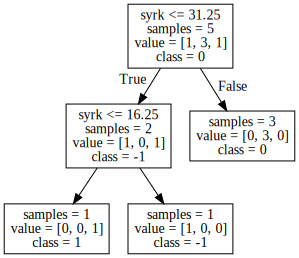

In [58]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns[:-1],
                                class_names = sorted(['-1','0','1']),
                                filled=False, impurity=False)
graph = graphviz.Source(dot_data, format="png") 
graph

In [44]:
y = X.values[:,-1]
y==1

array([False, False,  True, False, False])

In [45]:
X.values[:,0][X.values[:,-1]==1]

array([10.])

In [46]:
def plot_clf_regions(X, y, kernelA, kernelB, clf, tick_size=18, colors = ['crimson', 'white', 'lightgreen']):
    
    fig = plt.figure(figsize=[10,8])
    ax = fig.add_subplot(111)
    
    ax.plot(X[:,0][y==-1], X[:,1][y==-1], "o", color=colors[0])
    ax.plot(X[:,0][y==0], X[:,1][y==0], "^", color='black')
    ax.plot(X[:,0][y==1], X[:,1][y==1], "x", color=colors[2])
    
    xx, yy = np.meshgrid(np.linspace(0.0, X[:, 0].max()+1, 100), np.linspace(0.0, X[:, 1].max()+1, 100))
    pred = clf.predict(np.c_[(xx.ravel(), yy.ravel())])
    
    ax.contourf(xx, yy, pred.reshape(xx.shape), cmap=ListedColormap(colors), alpha=0.25)
    
    ax.set_xlabel("{} (MFLOPs)".format(kernelA), size=18)
    ax.set_ylabel("{} (MFLOPs)".format(kernelB), size=18)
    ax.tick_params(labelsize=18)
    
    return fig
    
    

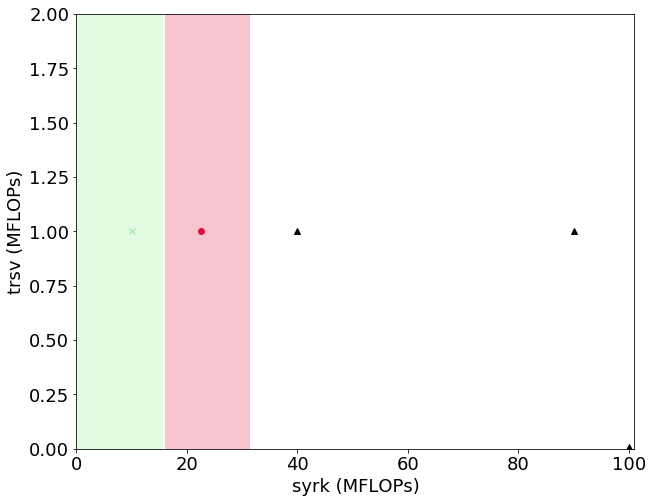

In [47]:
fig = plot_clf_regions(X.values[:,:-1], X.values[:,-1], X.columns[0], X.columns[1],clf)

In [50]:
def get_tree_gviz(clf, kernelA, kernelB, colors = ['crimson', 'white', 'lightgreen']):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=[kernelA, kernelB],
                                class_names = sorted(['-1','0','1']),
                                filled=True, impurity=True)
    #g = pydotplus.graph_from_dot_data(dot_data)
    dg = pgv.AGraph(dot_data)
    #print(dg)
    for node in dg.nodes():
        
        bLeaf = False
        
        label_data = node.attr['label'].split("\\n")
        
        if len(label_data) == 4:
            bLeaf = True
        
        impurity = float(label_data[-4].split("=")[1])
        cls = int(label_data[-1].split("=")[1])
        values = ast.literal_eval(label_data[-2].split("=")[1].strip())
        
        # set color
        r, g, b = to_rgb(colors[np.argmax(values)])
        f = impurity*3/2.
        rgb = (min(f + (1-f)*r, 1.0),\
               min(f + (1-f)*g, 1.0),\
               min(f + (1-f)*b,1.0), 0.5)
        node.attr['fillcolor'] = to_hex(rgb, keep_alpha=True)
        
        new_label = ""
        if not bLeaf:
            new_label += label_data[0] +"\n\n"
        new_label += label_data[-4] + "\n"
        new_label += "num " + label_data[-3] + "\n"
        new_label += "majority " + label_data[-1] 
        
        node.attr['label'] = new_label
        
        #print(impurity, cls, to_hex(rgb))
        
    graph = graphviz.Source(dg.string()) 
    return graph

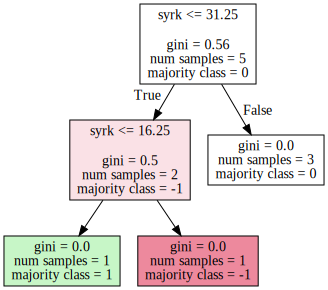

In [51]:
g = get_tree_gviz(clf, X.columns[0], X.columns[1])
g

In [43]:
de.data_relations

,nodeA,nodeB,class,operands,flopsA,kernelA,flopsB,kernelB
0,LAPACK.potrf_2.67e+06,gemv_4e+05,0,1000_200,2670000.0,LAPACK.potrf,400000.0,gemv
1,LAPACK.potrf_2.67e+06,trsv_1e+06,1,1000_200,2670000.0,LAPACK.potrf,1000000.0,trsv
2,LAPACK.potrf_2.67e+06,trsv_4e+04,1,1000_200,2670000.0,LAPACK.potrf,40000.0,trsv
3,LAPACK.potrf_3.33e+08,trsm_2e+08,0,1000_200,333000000.0,LAPACK.potrf,200000000.0,trsm
4,LAPACK.potrf_3.33e+08,trsv_1e+06,1,1000_200,333000000.0,LAPACK.potrf,1000000.0,trsv
...,...,...,...,...,...,...,...,...
104,trsv_1e+04,trsv_1e+04,0,100_1000,10000.0,trsv,10000.0,trsv
105,trsv_1e+06,trsv_1e+06,0,100_1000,1000000.0,trsv,1000000.0,trsv
106,trsv_1e+06,@@endnode,0,100_1000,1000000.0,trsv,0.0,@@endnode
107,@@startnode,LAPACK.potrf_3.33e+05,0,100_1000,0.0,@@startnode,333000.0,LAPACK.potrf


In [47]:
X

,syrk,trsv,class
10,40.0,1.00,0
31,90.0,1.00,0
52,10.0,1.00,1
73,22.5,1.00,-1
95,100.0,0.01,0


In [54]:
def get_op_str(df, kernelA, flopsA, kernelB, flopsB):
    condition = (df['kernelA'] == kernelA) & \
                (df['flopsA'] == flopsA*10**6) & \
                (df['kernelB'] == kernelB) & \
                (df['flopsB'] == flopsB*10**6)
    
    return df[condition]['operands'].to_list()
    

In [59]:
op_str = get_op_str(de.data_relations, X.columns[0], 10.0, X.columns[1], 1.0)[0]
op_str

'1000_100'

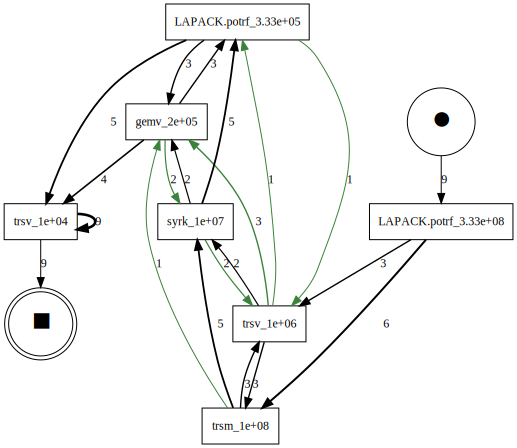

In [60]:
de.data_vcs[op_str].get_dfg_minus_best_worst()

In [61]:
de.data_ranks[op_str]

,case:concept:name,case:rank:q75-q25
0,algorithm0,0
1,algorithm6,0
2,algorithm4,0
3,algorithm7,0
4,algorithm1,0
5,algorithm5,0
6,algorithm3,0
7,algorithm8,1
8,algorithm2,1


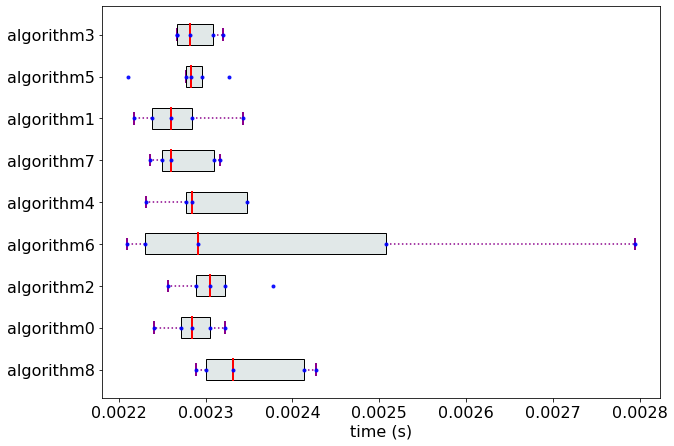

In [62]:
fig = de.visualize_box_plots(op_str)

In [36]:
#print(g)
#g.render(filename='tree', format='dot')

In [37]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[21, 10])

# #colors = ['crimson', 'orange', 'lightgreen']
# colors = ['crimson', 'lightgrey', 'lightgreen']
# ax1.plot(X.values[:,0][X.values[:,-1]==-1], X.values[:,1][X.values[:,-1]==-1], "o", color=colors[0])
# ax1.plot(X.values[:,0][X.values[:,-1]==0], X.values[:,1][X.values[:,-1]==0], "^", color=colors[1])
# ax1.plot(X.values[:,0][X.values[:,-1]==1], X.values[:,1][X.values[:,-1]==1], "x", color=colors[2])
# xx, yy = np.meshgrid(np.linspace(0.0, X.values[:, 0].max()+1, 100), np.linspace(0.0, X.values[:, 1].max()+1, 100))
# pred = clf.predict(np.c_[(xx.ravel(), yy.ravel())])
# ax1.contourf(xx, yy, pred.reshape(xx.shape), cmap=ListedColormap(colors), alpha=0.25)
# ax1.set_xlabel(X.columns[0], size=18)
# ax1.set_ylabel(X.columns[1], size=18)
# ax1.tick_params(labelsize=18)

# #ax2.set_prop_cycle(mpl.cycler(color=colors)) # doesn't seem to work

# ## TODO: Do this with graph viz
# ##TODO: Add op size to data in prepare_data
# artists = tree.plot_tree(clf, feature_names=X.columns[:-1], class_names=sorted(['-1','0','1']),
#                          filled=True, ax=ax2)
# for artist, impurity, value in zip(artists, clf.tree_.impurity, clf.tree_.value):
#     # let the max value decide the color; whiten the color depending on impurity (gini)
#     r, g, b = to_rgb(colors[np.argmax(value)])
#     f = impurity*3/2.  # for N colors: f = impurity * N/(N-1) if N>1 else 0
#     print(impurity, (f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
#     artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
#     artist.get_bbox_patch().set_edgecolor('black')

# plt.tight_layout()
# plt.show()

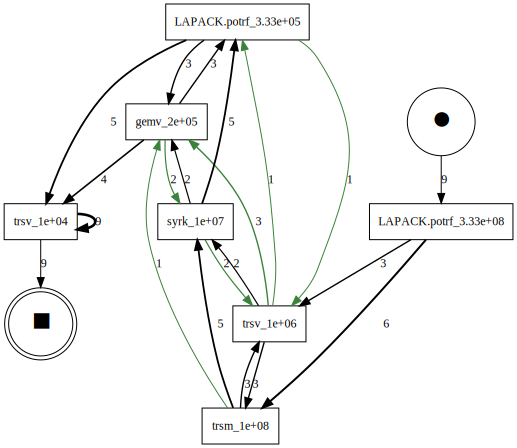

In [38]:
de.data_vcs['1000_100'].get_dfg_minus_best_worst()

In [35]:
de.data_ranks['1000_100']

,case:concept:name,case:rank:q75-q25
0,algorithm0,0
1,algorithm6,0
2,algorithm4,0
3,algorithm7,0
4,algorithm1,0
5,algorithm5,0
6,algorithm3,0
7,algorithm8,1
8,algorithm2,1


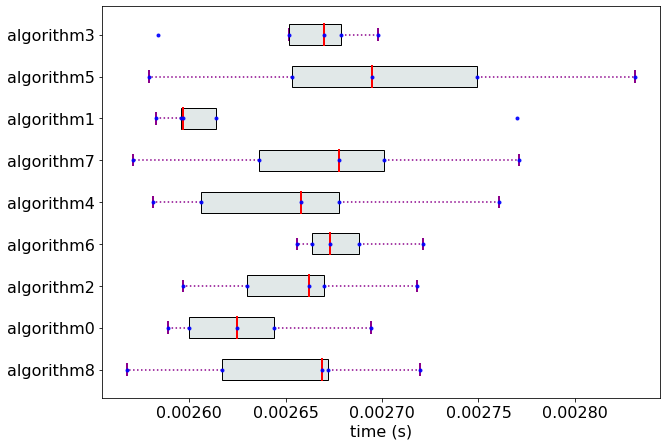

In [36]:
fig = de.visualize_box_plots('1000_150')

In [37]:
d_ex = de.data_ext
d_ex

,kernel,concept:flops,case:rel-flops
0,LAPACK.potrf,333000000.0,0.0
1,trsm,200000000.0,0.0
2,trsv,1000000.0,0.0
3,syrk,40000000.0,0.0
4,gemv,400000.0,0.0
5,LAPACK.potrf,2670000.0,0.0
6,trsv,40000.0,0.0
7,LAPACK.potrf,333000000.0,0.0
8,trsm,300000000.0,0.0
9,trsv,1000000.0,0.0


In [203]:
de.data_relations['operands'] = "100_100"

In [204]:
de.data_relations

,nodeA,nodeB,class,flopsA,kernelA,flopsB,kernelB,operands
0,LAPACK.potrf_2.67e+06,gemv_4e+05,0,2670000.0,LAPACK.potrf,400000.0,gemv,100_100
1,LAPACK.potrf_2.67e+06,trsv_1e+06,1,2670000.0,LAPACK.potrf,1000000.0,trsv,100_100
2,LAPACK.potrf_2.67e+06,trsv_4e+04,1,2670000.0,LAPACK.potrf,40000.0,trsv,100_100
3,LAPACK.potrf_3.33e+08,trsm_2e+08,0,333000000.0,LAPACK.potrf,200000000.0,trsm,100_100
4,LAPACK.potrf_3.33e+08,trsv_1e+06,1,333000000.0,LAPACK.potrf,1000000.0,trsv,100_100
...,...,...,...,...,...,...,...,...
104,trsv_1e+04,trsv_1e+04,0,10000.0,trsv,10000.0,trsv,100_100
105,trsv_1e+06,trsv_1e+06,0,1000000.0,trsv,1000000.0,trsv,100_100
106,trsv_1e+06,@@endnode,0,1000000.0,trsv,0.0,@@endnode,100_100
107,@@startnode,LAPACK.potrf_3.33e+05,0,0.0,@@startnode,333000.0,LAPACK.potrf,100_100
